In [1]:
import numpy as np

In [2]:
def f(t, y, pars, od_sp):
    X1, X2, S, I, P = y
    S0, k1, KS1, k2, KI2, mu1max, mu2max, KSmu, Y  = pars

    mu1 = mu1max * S / (KSmu + S)
    mu2 = mu2max * S / (KSmu + S)

    if X1 + X2 > od_sp:
        d = (mu1 * X1 + mu2 * X2) / (X1 + X2)
    else:
        d = 0

    dX1dt = (mu1 - d) * X1
    dX2dt = (mu2 - d) * X2

    dSdt = d * (S0 - S) - k1 * X1 * S / (KS1 + S) - (mu1*X1 + mu2*X2) * Y
    dIdt = k1 * X1 * S / (KS1 + S) - k2 * X2 * I / (KI2 + I) - d * I
    dPdt = k2 * X2 * I / (KI2 + I) - d * P

    return [dX1dt, dX2dt, dSdt, dIdt, dPdt]

In [12]:
Ks = 2
Y = 2

S0 = 20
k1 = 0.2
KS1 = 1
k2 = 0.2
KI2 = 1
mu1max = 0.3
mu2max = 0.3
KSmu = 1
Y = 2

pars = S0, k1, KS1, k2, KI2, mu1max, mu2max, KSmu, Y

/tmp/ipykernel_1314869/3481412.py:40: RuntimeWarning: invalid value encountered in divide
  ax2.plot(sol.t, sol.y[4]/sol.t, label='P over t', color='green')


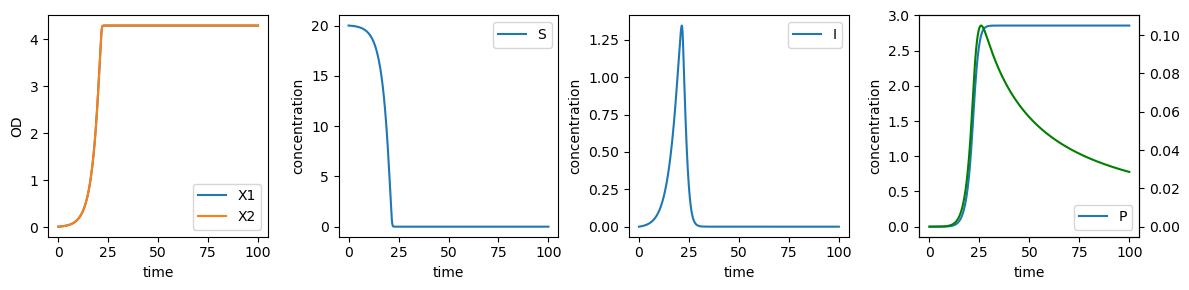

In [13]:
from scipy.integrate import solve_ivp

tspan = [0, 100]
y0 = [0.01, 0.01, S0, 0, 0]
od_sp = 100

sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='LSODA', t_eval=np.linspace(0, 100, 1000))

import matplotlib.pyplot as plt
plot = True

if plot:
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(141)
    ax.plot(sol.t, sol.y[0], label='X1')
    ax.plot(sol.t, sol.y[1], label='X2')
    ax.set_xlabel('time')
    ax.set_ylabel('OD')
    ax.legend()

    ax = fig.add_subplot(142)
    ax.plot(sol.t, sol.y[2], label='S')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax = fig.add_subplot(143)
    ax.plot(sol.t, sol.y[3], label='I')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax = fig.add_subplot(144)
    ax.plot(sol.t, sol.y[4], label='P')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax2 = ax.twinx()
    ax2.plot(sol.t, sol.y[4]/sol.t, label='P over t', color='green')
    plt.tight_layout()

/tmp/ipykernel_1314869/1881736892.py:16: RuntimeWarning: invalid value encountered in divide
  prodyield_arr[i] = np.nanmax(sol.y[4] / sol.t)


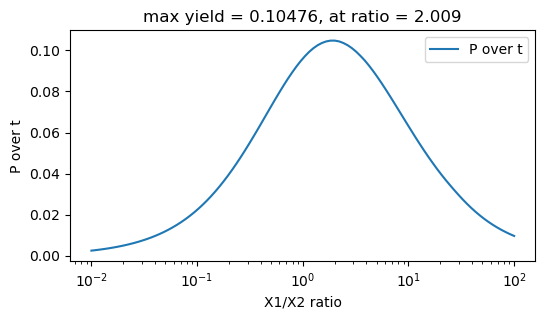

In [14]:
from scipy.integrate import solve_ivp

X1X2_ratio_arr = 10 ** np.linspace(-2, 2, 100)

prodyield_arr = np.zeros_like(X1X2_ratio_arr)

for i, X1X2_ratio in enumerate(X1X2_ratio_arr):
    tspan = [0, 100]
    X10 = X1X2_ratio * 0.01 / (1 + X1X2_ratio)
    X20 = 0.01 - X10
    y0 = [X10, X20, S0, 0, 0]
    od_sp = 100

    sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='LSODA', t_eval=np.linspace(0, 100, 1000))

    prodyield_arr[i] = np.nanmax(sol.y[4] / sol.t)

if True:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(111)
    ax.semilogx(X1X2_ratio_arr, prodyield_arr, label='P over t')
    ax.set_xlabel('X1/X2 ratio')
    ax.set_ylabel('P over t')
    ax.set_title('max yield = {:.5f}, at ratio = {:.3f}'.format(np.max(prodyield_arr), X1X2_ratio_arr[np.argmax(prodyield_arr)]))
    ax.legend()


/tmp/ipykernel_1314869/1292103641.py:45: RuntimeWarning: invalid value encountered in divide
  ax2.plot(sol.t, sol.y[4]/sol.t, label='P over t', color='green')


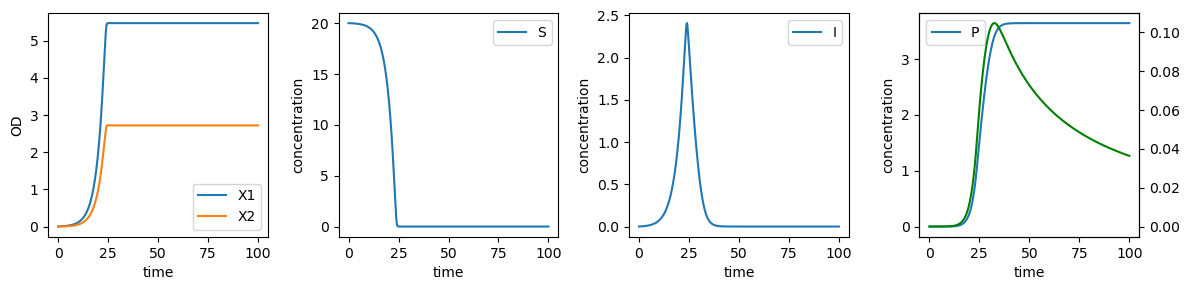

In [15]:
from scipy.integrate import solve_ivp

tspan = [0, 100]

X1X2_ratio_ideal = X1X2_ratio_arr[np.argmax(prodyield_arr)]
X10 = X1X2_ratio_ideal * 0.01 / (1 + X1X2_ratio_ideal)
X20 = 0.01 - X10

y0 = [X10, X20, S0, 0, 0]
od_sp = 100

sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='LSODA', t_eval=np.linspace(0, 100, 1000))

import matplotlib.pyplot as plt
plot = True

if plot:
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(141)
    ax.plot(sol.t, sol.y[0], label='X1')
    ax.plot(sol.t, sol.y[1], label='X2')
    ax.set_xlabel('time')
    ax.set_ylabel('OD')
    ax.legend()

    ax = fig.add_subplot(142)
    ax.plot(sol.t, sol.y[2], label='S')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax = fig.add_subplot(143)
    ax.plot(sol.t, sol.y[3], label='I')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax = fig.add_subplot(144)
    ax.plot(sol.t, sol.y[4], label='P')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax2 = ax.twinx()
    ax2.plot(sol.t, sol.y[4]/sol.t, label='P over t', color='green')
    plt.tight_layout()

In [16]:
# Ks = 2
# Y = 2

# S0 = 20
# k1 = 0.2
# KS1 = 1
# k2 = 0.2
# KI2 = 1
# mu1max = 0.45
# mu2max = 0.45
# KSmu = 20
# Y = 2

# pars = S0, k1, KS1, k2, KI2, mu1max, mu2max, KSmu, Y

In [17]:
from scipy.integrate import solve_ivp

X1X2_ratio_arr = 10 ** np.linspace(-2, 2, 100)
time_switch = np.linspace(0, 40, 40)

prodyield_arr = np.zeros((X1X2_ratio_arr.size, time_switch.size))

for i, X1X2_ratio in enumerate(X1X2_ratio_arr):
    for j, t_switch in enumerate(time_switch):
        X10 = X1X2_ratio * 0.01 / (1 + X1X2_ratio)
        X20 = 0.01 - X10
        y0 = [X10, X20, S0, 0, 0]
        od_sp = 100

        t_arr = []
        y_arr = []

        if t_switch > 0:
            tspan = [0, t_switch]
            pars = S0, k1, KS1, k2, KI2, mu1max, 0, KSmu, Y
            sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='LSODA', t_eval=np.linspace(0, t_switch, 1000))
            t_arr.append(sol.t)
            y_arr.append(sol.y[4])
            y0 = sol.y[:, -1]

        tspan = [t_switch, 100]
        pars = S0, k1, KS1, k2, KI2, 0, mu2max, KSmu, Y
        sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='LSODA', t_eval=np.linspace(t_switch, 100, 1000))
        t_arr.append(sol.t)
        y_arr.append(sol.y[4])

        t_arr = np.concatenate(t_arr)
        y_arr = np.concatenate(y_arr)

        prodyield_arr[i,j] = np.nanmax(y_arr[t_arr > 0] / t_arr[t_arr > 0])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_1314869/3770388143.py:51: RuntimeWarning: invalid value encountered in divide
  ax2.plot(t_arr, sol_arr[4]/t_arr, label='P over t', color='green')


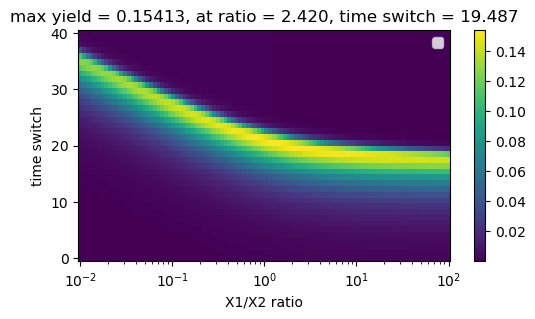

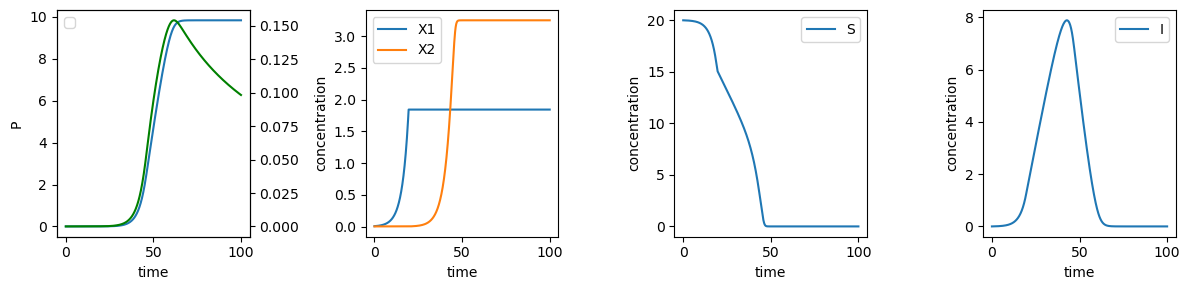

In [24]:
Xplot, Yplot = np.meshgrid(X1X2_ratio_arr, time_switch, indexing='ij')
Zplot = prodyield_arr

if True:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(111)
    im = ax.pcolormesh(Xplot, Yplot, Zplot)
    ax.set_xlabel('X1/X2 ratio')
    ax.set_ylabel('time switch')
    ax.set_xscale('log')
    ax.set_title('max yield = {:.5f}, at ratio = {:.3f}, time switch = {:.3f}'.format(np.nanmax(Zplot), Xplot.flatten()[np.argmax(Zplot)], Yplot.flatten()[np.argmax(Zplot)]))
    ax.legend()
    fig.colorbar(im)

    X1X2_ratio = Xplot.flatten()[np.argmax(Zplot)]
    t_switch = Yplot.flatten()[np.argmax(Zplot)]

    X10 = X1X2_ratio * 0.01 / (1 + X1X2_ratio)
    X20 = 0.01 - X10
    y0 = [X10, X20, S0, 0, 0]
    od_sp = 100

    t_arr = []
    sol_arr = []

    if t_switch > 0:
        tspan = [0, t_switch]
        pars = S0, k1, KS1, k2, KI2, mu1max, 0, KSmu, Y
        sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='BDF', t_eval=np.linspace(0, t_switch, 1000))
        t_arr.append(sol.t)
        sol_arr.append(sol.y)
        y0 = sol.y[:, -1]

    tspan = [t_switch, 100]
    pars = S0, k1, KS1, k2, KI2, 0, mu2max, KSmu, Y
    sol = solve_ivp(lambda t, y: f(t, y, pars, od_sp), tspan, y0, method='BDF', t_eval=np.linspace(t_switch, 100, 1000))
    t_arr.append(sol.t)
    sol_arr.append(sol.y)

    t_arr = np.concatenate(t_arr)
    sol_arr = np.concatenate(sol_arr, axis=1)

    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(141)
    ax.plot(t_arr, sol_arr[4])
    ax.set_xlabel('time')
    ax.set_ylabel('P')
    ax.legend()

    ax2 = ax.twinx()
    ax2.plot(t_arr, sol_arr[4]/t_arr, label='P over t', color='green')
    
    ax = fig.add_subplot(142)
    ax.plot(t_arr, sol_arr[0], label='X1')
    ax.plot(t_arr, sol_arr[1], label='X2')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax = fig.add_subplot(143)
    ax.plot(t_arr, sol_arr[2], label='S')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    ax = fig.add_subplot(144)
    ax.plot(t_arr, sol_arr[3], label='I')
    ax.set_xlabel('time')
    ax.set_ylabel('concentration')
    ax.legend()

    plt.tight_layout()


In [19]:
sol_arr.shape

(5, 2000)

In [20]:
print(y_arr)
print(t_arr)

[0.00000000e+00 4.07357049e-11 1.33085320e-10 ... 1.38616040e-03
 1.38715145e-03 1.38814249e-03]
[0.00000000e+00 1.95066862e-02 3.90133723e-02 ... 9.98388132e+01
 9.99194066e+01 1.00000000e+02]
